In [278]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

## settings to show the graphs inline
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [279]:
df = pd.read_csv("GBM_Expression_Data_For_Clustering.csv",delimiter=',',engine='python')

In [280]:
X = df.as_matrix()
X.shape 
## confirming that the dataset was loaded as a matrix properly
## X.shape == (n,m) where n = # samples, m = # features (genes + patient ID)

(47, 8)

In [283]:
## generate the linkage matrix
Z = linkage(X,'complete') ## using complete linkage as the between-cluster distance metric
Y = pdist(X,'euclidean') ## using euclidean distance as the similarity metric

In [284]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.42527454616876775

In [285]:
Z[0]

array([ 11.    ,  41.    ,   0.8651,   2.    ])

In [286]:
Z[1]

array([  0.     ,  37.     ,   1.09686,   2.     ])

In [287]:
Z[2]

array([ 26.     ,  38.     ,   1.48327,   2.     ])

In [288]:
Z[:20]

array([[ 11.     ,  41.     ,   0.8651 ,   2.     ],
       [  0.     ,  37.     ,   1.09686,   2.     ],
       [ 26.     ,  38.     ,   1.48327,   2.     ],
       [  3.     ,  10.     ,   1.48802,   2.     ],
       [ 12.     ,  29.     ,   1.49586,   2.     ],
       [ 36.     ,  50.     ,   1.59129,   3.     ],
       [  1.     ,   5.     ,   1.59185,   2.     ],
       [ 44.     ,  48.     ,   1.59747,   3.     ],
       [ 17.     ,  45.     ,   1.72247,   2.     ],
       [ 32.     ,  40.     ,   1.78062,   2.     ],
       [ 27.     ,  35.     ,   1.98484,   2.     ],
       [ 19.     ,  49.     ,   2.02178,   3.     ],
       [ 46.     ,  51.     ,   2.11681,   3.     ],
       [ 15.     ,  18.     ,   2.12558,   2.     ],
       [  8.     ,  14.     ,   2.15381,   2.     ],
       [ 23.     ,  42.     ,   2.19889,   2.     ],
       [ 24.     ,  30.     ,   2.21644,   2.     ],
       [  9.     ,  16.     ,   2.22962,   2.     ],
       [ 33.     ,  64.     ,   2.33454,   3. 

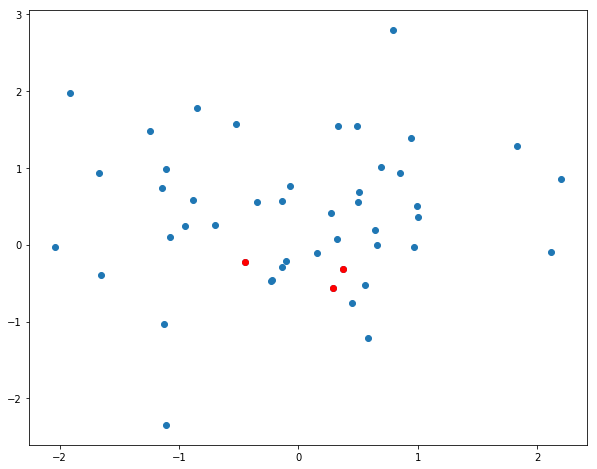

In [289]:
idxs = [12,29,44]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1]) ## plot all points
plt.scatter(X[idxs,0], X[idxs,1],c='r') ## plot strange points in red
plt.show()

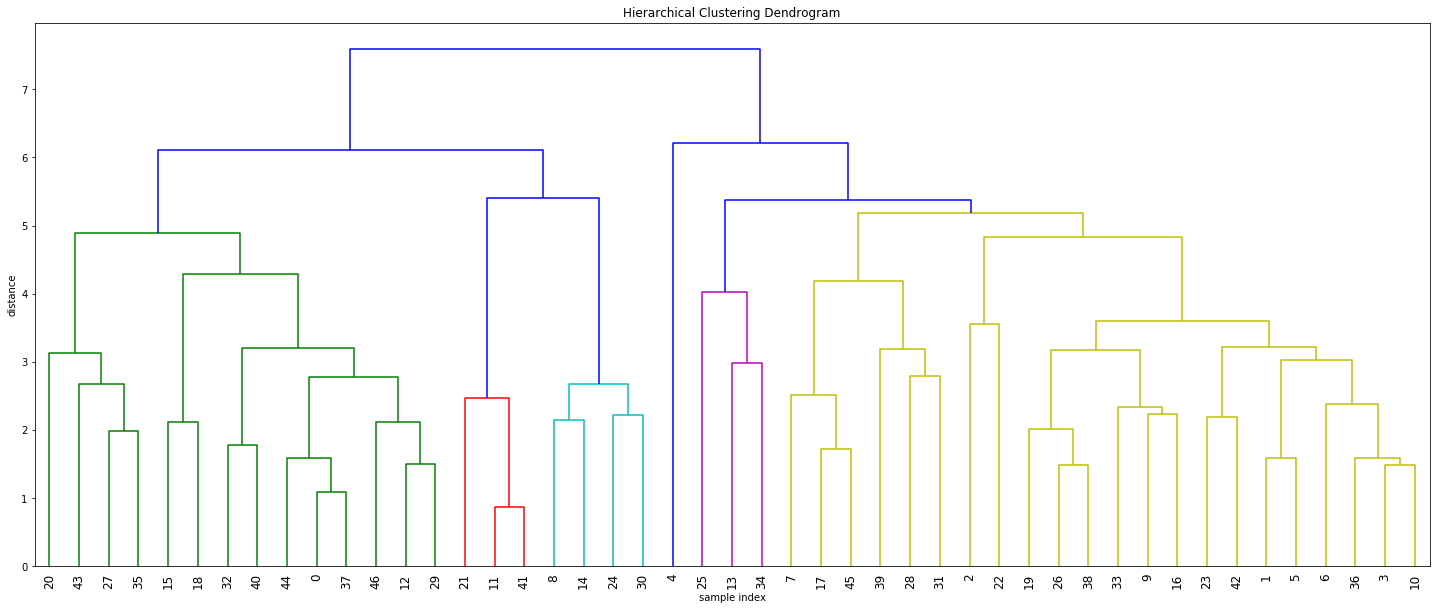

In [290]:
## calculating full dendrogram
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,
          leaf_rotation=90.,
          leaf_font_size=12)
plt.show()

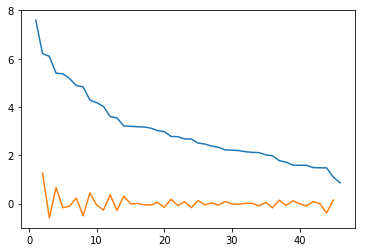

clusters: 2


In [291]:
last = Z[-50:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

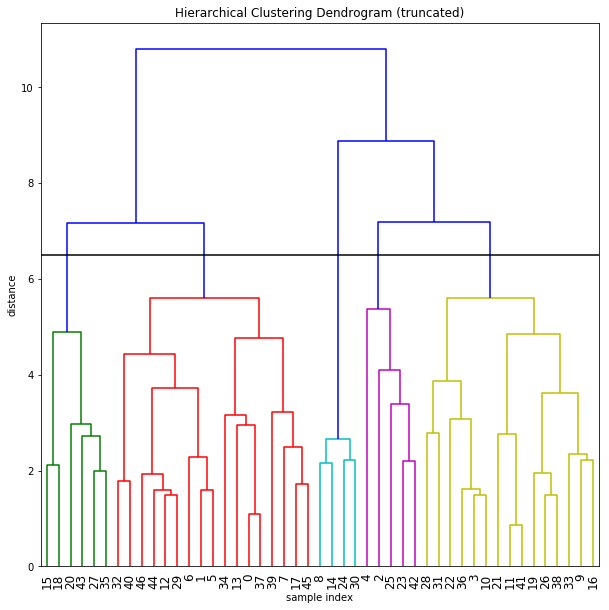

In [303]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

Z = linkage(X, 'ward')
plt.figure(figsize=(10,10))
fancy_dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=40,
    max_d=6.5,
)
plt.show()

In [315]:
from scipy.cluster.hierarchy import fcluster
max_d = 6.5
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 2, 4, 5, 4, 2, 2, 2, 3, 5, 5, 5, 2, 2, 3, 1, 5, 2, 1, 5, 1, 5, 5,
       4, 3, 4, 5, 1, 5, 2, 3, 5, 2, 5, 2, 1, 5, 2, 5, 2, 2, 5, 4, 1, 2, 2,
       2], dtype=int32)

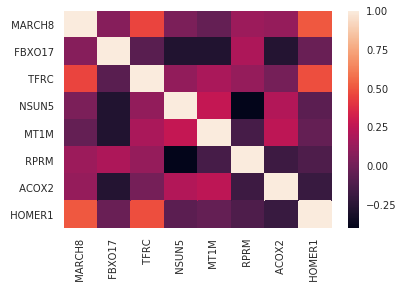

In [321]:
import seaborn as sns
sns.set()
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

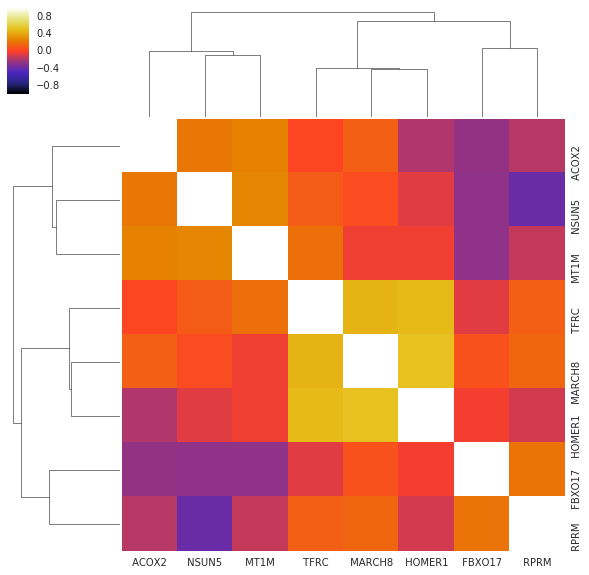

In [369]:
sns.clustermap(df.corr(),cmap='CMRmap',vmin=-1,vmax=1);

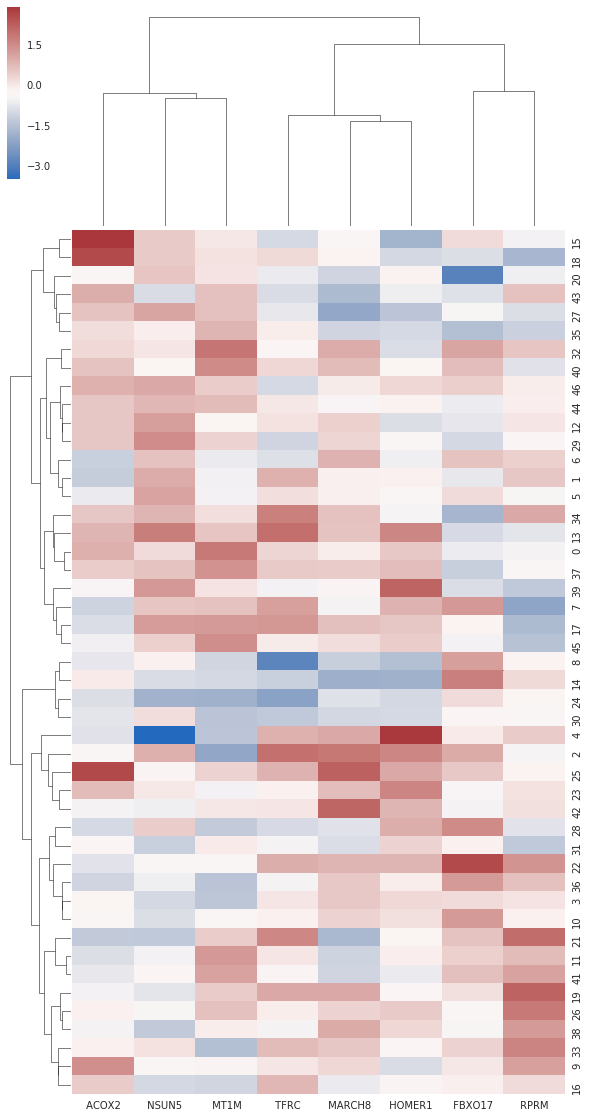

In [370]:
sns.clustermap(df,z_score=1,method='ward',cmap='vlag',figsize=(10,20));